In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [50]:
import matplotlib.font_manager

# matplotlib.font_manager.fontManager.addfont("/home/nnt7/miniconda3/envs/escape_env/fonts/arial.ttf")
# prop = matplotlib.font_manager.FontProperties(fname="/home/nnt7/miniconda3/envs/escape_env/fonts/arial.ttf")

rc={'font.size' : 6,
    'font.family' : 'sans-serif',
   # 'font.sans-serif':prop.get_name(),
    'axes.labelsize': 6,  
    'legend.fontsize': 6,
    'axes.titlesize': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'axes.edgecolor': 'k',
    'axes.linewidth': 0.5,
    'axes.grid': False,
    'figure.dpi': 150,
    'xtick.major.pad': -3,
    'ytick.major.pad': -3}

sns.set_theme(palette = sns.color_palette("husl", 3), style="white", font='Arial', rc=rc)

In [51]:
pwd

'/n/groups/patel/aashna/xray-dl/data-exploration'

In [52]:
df_train = pd.read_csv('../data/splits/chexpert/chexpert.sample.train.csv')
df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,...,Fracture,Support Devices,No Finding,Unnamed: 0,split,race_label,sex_label,disease,disease_label,path_preproc
0,0,0,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study22/view1...,Male,59,Frontal,AP,...,NaN,1.0,NaN,53688.0,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...
1,1,1,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study39/view1...,Male,61,Frontal,PA,...,NaN,NaN,NaN,53689.0,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...
2,2,2,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study61/view1...,Male,61,Frontal,AP,...,NaN,1.0,NaN,53690.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study61_view1_fro...
3,3,3,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study35/view1...,Male,60,Frontal,AP,...,NaN,1.0,NaN,53691.0,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...
4,4,4,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study45/view1...,Male,61,Frontal,AP,...,NaN,1.0,NaN,53692.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study45_view1_fro...


In [134]:
df_train[(df_train['No Finding']==1) & (df_train['Lung Opacity']==1)][[
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices', 'label']]

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,label
19851,1.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
41335,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
53224,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
61824,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [54]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']

samples = []
for idx, _ in enumerate(range(len(df_train))):
    img_label = np.zeros(len(labels), dtype='float32')
    for i in range(0, len(labels)):
        img_label[i] = np.array(df_train.loc[idx, labels[i].strip()] == 1, dtype='float32')

    sample = str(img_label)
    samples.append(sample)

df_train['label'] = samples
df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,...,Support Devices,No Finding,Unnamed: 0,split,race_label,sex_label,disease,disease_label,path_preproc,label
0,0,0,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study22/view1...,Male,59,Frontal,AP,...,1.0,NaN,53688.0,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,1,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study39/view1...,Male,61,Frontal,PA,...,NaN,NaN,53689.0,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2,2,2,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study61/view1...,Male,61,Frontal,AP,...,1.0,NaN,53690.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study61_view1_fro...,[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
3,3,3,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study35/view1...,Male,60,Frontal,AP,...,1.0,NaN,53691.0,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...,[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
4,4,4,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study45/view1...,Male,61,Frontal,AP,...,1.0,NaN,53692.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study45_view1_fro...,[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]


In [93]:
def bin_age(age):
    if age <= 50:
        return 0
    # if age <= 60:
    #     return 1
    # if age <= 80:
    #     return 2
    # if age <= 50:
    #     return 3
    # if age <= 60:
    #     return 4
    # if age <= 70:
    #     return 5
    # if age <= 80:
    #     return 6
    return 2

df_train["age_bin"] = df_train["age"].apply(bin_age)

In [160]:
df_train.value_counts("race", normalize=True)

race
White    0.777351
Asian    0.149216
Black    0.073434
dtype: float64

In [184]:
sample_size_factor = 3

n_samples = len(df_train) * sample_size_factor
w_race = (1 / df_train.value_counts("race", normalize=True)).to_dict()
ids = list(torch.utils.data.WeightedRandomSampler(df_train["race"].apply(lambda x: w_race[x]).values, n_samples, replacement=True))
df_train_bal = df_train.iloc[ids]
df_train_bal.value_counts("race", normalize=True)

race
Asian    0.334457
White    0.333071
Black    0.332472
dtype: float64

In [185]:
df_train_bal.race.unique()

array(['White', 'Black', 'Asian'], dtype=object)

In [190]:
subgroups = [df_train_bal.loc[df_train_bal["race"] == i] for i in df_train_bal.race.unique()]
overall_proportion_disease = df_train_bal.value_counts("label", normalize=True)
disease_labels = df_train_bal.label.unique()
overall_proportion_age_per_disease_label = [df_train_bal.loc[df_train_bal.label == d].value_counts("age_bin", normalize=True) for d in disease_labels]

for i, subgroup in enumerate(subgroups):
        # 1. Ensure constant disease prevalence in each subgroup
        n_samples = len(subgroup)
        observed_proportion = subgroup.value_counts("label", normalize=True)
        w = (overall_proportion_disease / observed_proportion).to_dict()
        ids = list(torch.utils.data.WeightedRandomSampler(subgroup["label"].apply(lambda x: w[x]).values, n_samples, replacement=True))
        subgroups[i] = subgroup.iloc[ids]

        # # 2. Further ensure constant age repartition across groups
        # subsubgroups = [subgroups[i].loc[subgroups[i].label == d] for d in disease_labels]
        # for j, subsubgroup in enumerate(subsubgroups): 
        #         n_samples = len(subsubgroup)
        #         observed_proportion = subsubgroup.value_counts("sex", normalize=True)
        #         w = (overall_proportion_age_per_disease_label[j] / observed_proportion).to_dict()
        #         ids = list(torch.utils.data.WeightedRandomSampler(subsubgroup["sex"].apply(lambda x: w[x]).values, n_samples, replacement=True))
        #         subsubgroups[j] = subsubgroup.iloc[ids]

        # subgroups[i] = pd.concat(subsubgroups)
        
df_train_bal = pd.concat(subgroups)

In [191]:
print(len(df_train_bal))
print(df_train_bal['patient_id'].nunique())

228615
20262


In [192]:
print(len(df_train))
print(df_train['patient_id'].nunique())

76205
25730


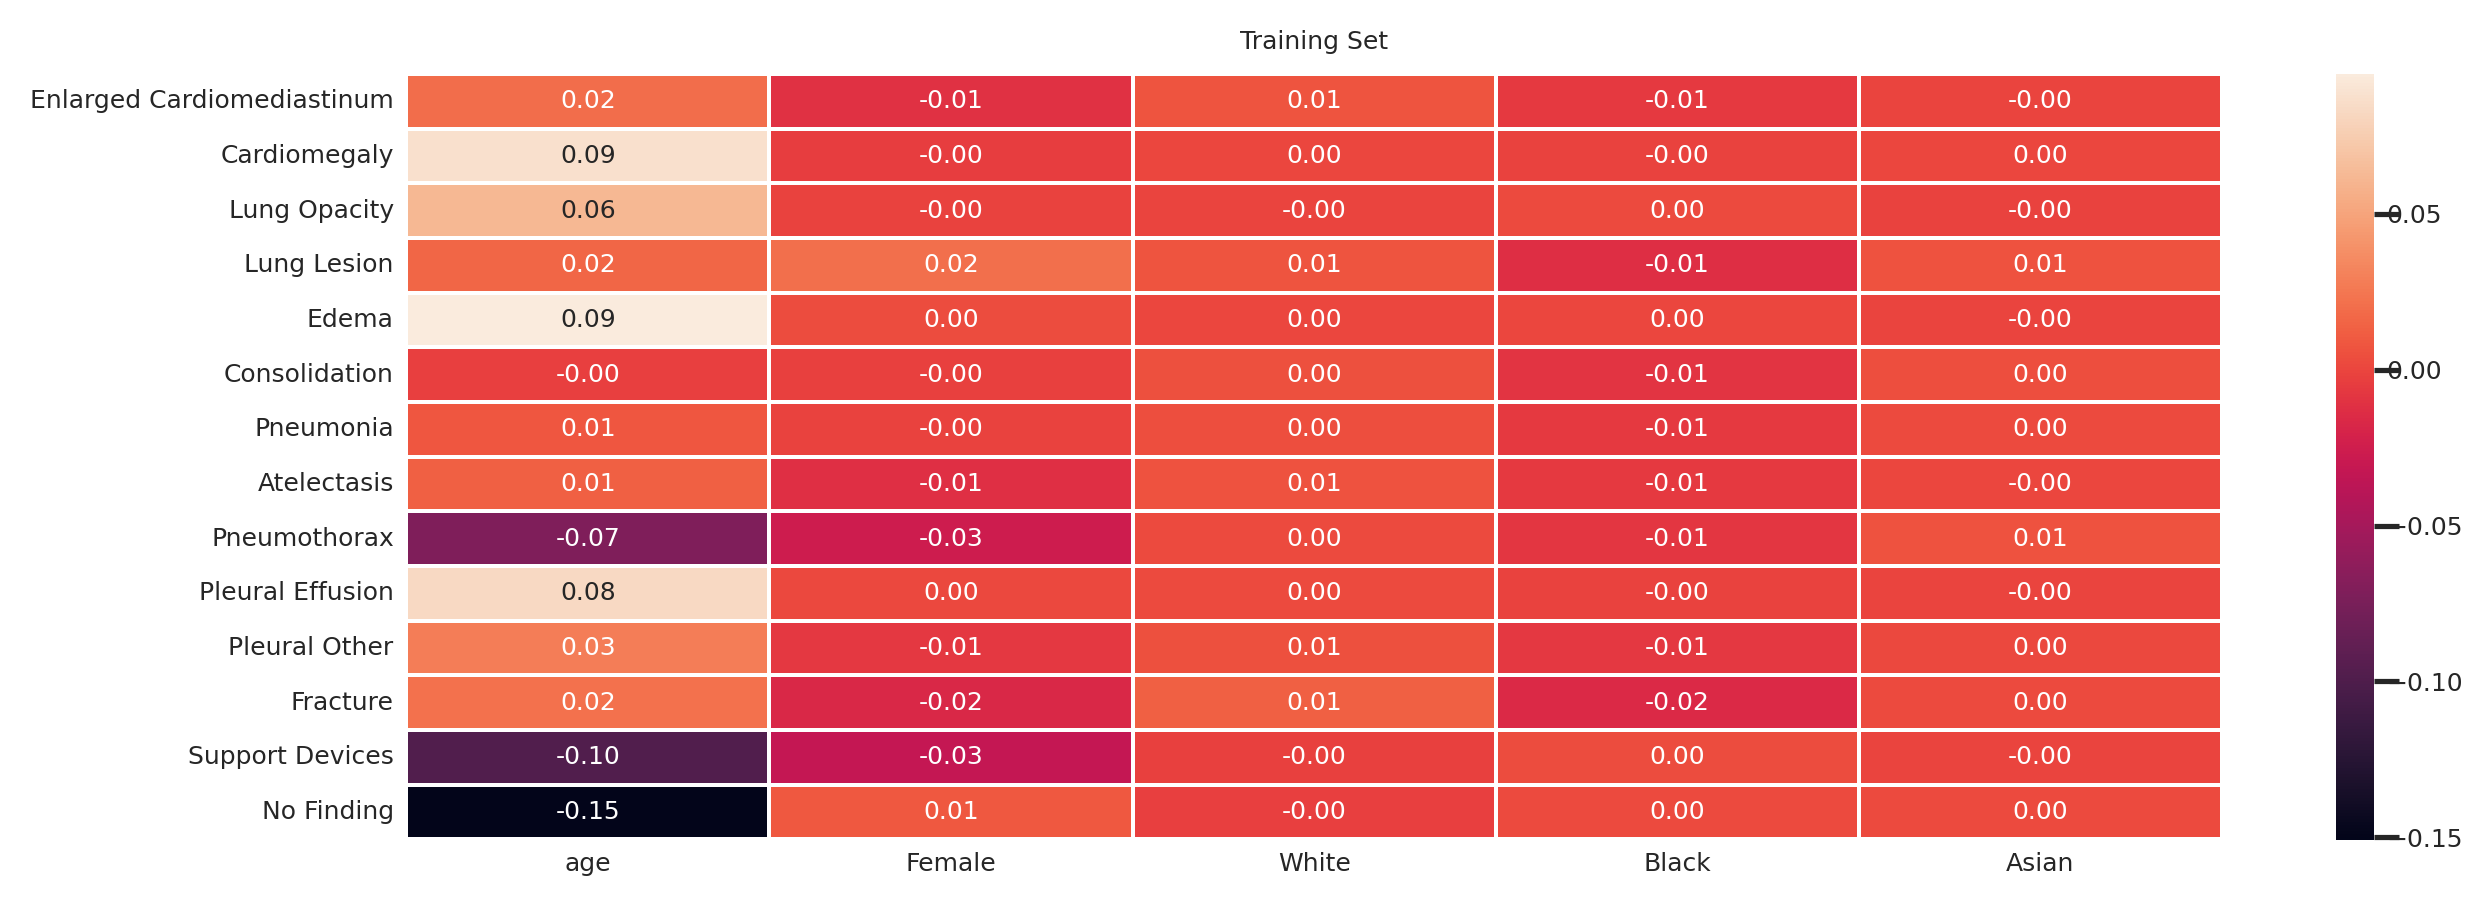

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharey=True, sharex=True, dpi=300)
df_names = ['Training Set', 'Validation Set', 'Test Set']

for idx, df in enumerate([df_train_bal]): #, df_val, df_test]):
   test = df.fillna(0) 
   test = test.replace(-1, 0) # Replace uncertain labels with positive labels

   sub_df = test[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
         'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
         'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
         'Support Devices', 'No Finding', 'age', 'race', 'sex']]
   selected_df = pd.get_dummies(sub_df, columns=['race'], prefix='', prefix_sep='')
   selected_df = pd.get_dummies(selected_df, columns=['sex'], prefix='', prefix_sep='')

   correlation_matrix = selected_df.corr()
   correlation_matrix = correlation_matrix.loc[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
                                            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                                            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
                                            'Support Devices', 'No Finding']]
   correlation_matrix = correlation_matrix[['age', 'Female', 'White', 'Black', 'Asian']]

   # Set up the matplotlib figure
   # Create a heatmap of the correlation matrix
   sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 6}, linewidths=.5, ax=ax) 
   ax.set_title(df_names[idx])

plt.tight_layout()
plt.show()

In [ ]:
df_train.to_csv(data_dir + 'chexpert.sample.balanced.train.csv')

In [194]:
print(df_train_bal.groupby(["race"]).size())

print(df_train_bal.groupby(["race", "label"]).size())

race
Asian    76462
Black    76008
White    76145
dtype: int64
race   label                                      
Asian  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    3767
       [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]    1971
       [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]     473
       [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]     146
       [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]     200
                                                      ... 
White  [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]       3
       [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]      16
       [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]       1
       [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]      12
       [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]       3
Length: 1576, dtype: int64


In [ ]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']